# Fixedpoint iteration to find equilibrium points

Finding the static equilibrium points &ndash; also commonly called the *fixpoints*, especially by computer scientists &ndash; is a common exercise, and one that can also illustrate some of the bewildering complexity of even apparently simple systems. In this notebook we'll look at how we can define an *iterated function system* where, from an initial starting point $x_0$, we repeatedly apply a function $f$ to create a "trajectory" for the point, from $x_0$ for $f(x_0)$ to $f(f(x_0))$ and so forth. For many systems these trajectories converge to an equilibrium point for which $f(x_{t + 1}) = f(x_t)$. We'll visualise these trajectories using "cobweb" plots, and then show how these can be used programmatically to find the equilibrium points of such systems.

In [3]:
# numpy
import numpy

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

## Cobweb plots

The idea behind a cobweb plot is to show the trajectory of a point within an iterated function system. For starters we need such a system, and we'll use the so-called *logistic map* which is used as a basis for many models in applications like predator-prey interactions.

Mathematically, the logistic map takes the form:

$$
y(x) = r x (1 - x / K)
$$

where $r$ and $K$ are parameters. Notice that this system is *non-linear*. We can make it computational by simply coding-up a higher-order function that build the parameterised model function.

In [4]:
def make_logistic(r, k):
    '''Create a logistic growth model.
    
    :param r: the growth factor
    :param K: the limiting factor
    :returns: the map'''
    
    def logistic(Nprime):
        '''Return the value of the loigistic map rx(1 - x/K).'''
        return r * Nprime * (1 - Nprime / K)
        
    return logistic

Using this function as an iterated function system simply means that we take an initial value $x_0$ and then repeatedly apply the map to its previous result.

We'll create an example system by fixing $r$ and $K$.

In [5]:
# logistic map
r = 2.8
K = 1
N = make_logistic(r, K)

# parameter space
xs = numpy.linspace(0.0, 1.0)

Since we'll be creating a lot of plots, let's define a plotting function to plot the function, and also add a diagonal line where $x = f(x)$.

In [6]:
def plotFunctionWithXY(ax, xs, f, linestyle, label=False):
    ax.plot(xs, list(map(f, xs)), linestyle)

    xmin, xmax = min(xs), max(xs)
    ax.plot([xmin, xmax], [xmin, xmax],
            color="0.5", linestyle='dotted')
    if label:
        ax.annotate('$x_t = x_{t - 1}$', [xmax * 0.75, xmax * 0.75],
                    [10, 0.0], textcoords='offset points')

The function looks like this:

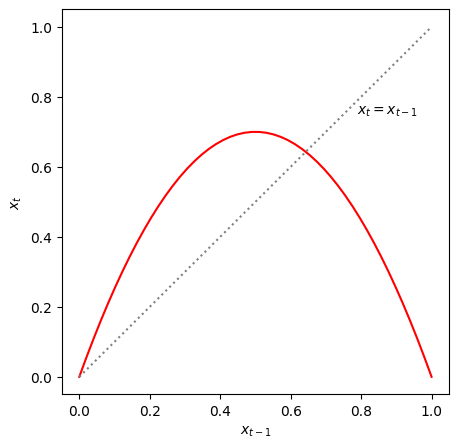

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plotFunctionWithXY(ax, xs, N, 'r-', label=True)

ax.set_xlabel('$x_{t - 1}$')
ax.set_ylabel('$x_t$')

plt.show()

## Constructing a trajectory within the iterated function system

The cobweb plot captures repeated steps of iterated function system starting from an initial value, and lets us see graphically how the system evolves. Let's assume we start from a point $x_0$.

Set up a pair of axes labelled $x_{t - 1}$ on the x axis and $x_t$ on the y axis. That is to say, we will be plotting the *current* point in the trajectory against the *last* point. Plot the map that we're using on these axes.

Starting from $x_0$ on the x axis we move up vertically up until we meet the map (at co-ordinates $(x_0, f(x_0))$). We then move horizontally to the y axis and read-off the value of $f(x_0)$. This will become the next value in the trajectory, $x_1$. We then move horizontally out from the y axis until we meet the $x = y$ diagonal line (at co-ordinates $(f(x_0), f(x_0)) = (x_1, x_1)$), and then down to the x axis (at co-ordinates $(x_1, 0)$). We now have the point $x_1$ ready for the next iteration.

Let's define a function to draw this single step. We mark the starting poiint with an open circle and the end poiint with a filled circle.

In [16]:
def plotDropSpider(ax, f, x0, t, c):
    x_t = x0
    for i in range(t):
        x_tm1 = x_t
        x_t = f(x_t)
    
    ax.plot([x_tm1, x_tm1], [0.0, x_t],
            color=c, linestyle='solid')
    ax.plot([0.0, x_tm1], [x_t, x_t],
            color=c, linestyle='dotted')
    ax.plot([0.0], [x_t], 
            color=c, marker='o', markersize=10, fillstyle='full', clip_on=False)
    ax.plot([x_tm1], [0.0], 
            color=c, marker='o', markersize=10, fillstyle='none', clip_on=False)
    ax.arrow(x_tm1, x_t, (x_t - x_tm1), 0, length_includes_head=True,
            color=c, head_width=0.025, shape='full')
    ax.arrow(x_t, x_t, 0, -x_t + 0.025, length_includes_head=True,
            color=c, head_width=0.025, shape='full')
    ax.plot([x_t], [0.0],
            color=c, marker='o', markersize=10, fillstyle='full', clip_on=False)
    
    ax.annotate('$x_{tm1}$'.format(tm1=t - 1), [x_tm1, 0.0],
                    [5, 5], textcoords='offset points')
    ax.annotate(f'$x_{t}$', [x_t, 0.0],
                    [5, 5], textcoords='offset points')

    return x_t

Plotting one step starting at $x_0 = 0.1$ gives:

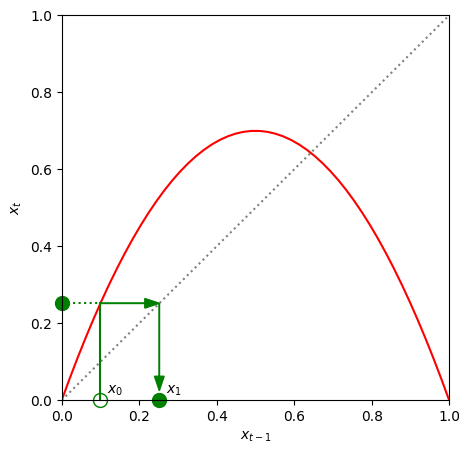

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plotFunctionWithXY(ax, xs, N, 'r-')
nt = plotDropSpider(ax, N, 0.1, 1, 'g')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('$x_{t - 1}$')
ax.set_ylabel('$x_t$')

plt.show()

The next step of the cobweb proceeds in exactly the same way, but starting from the point $x_1$ to find $x_2$.

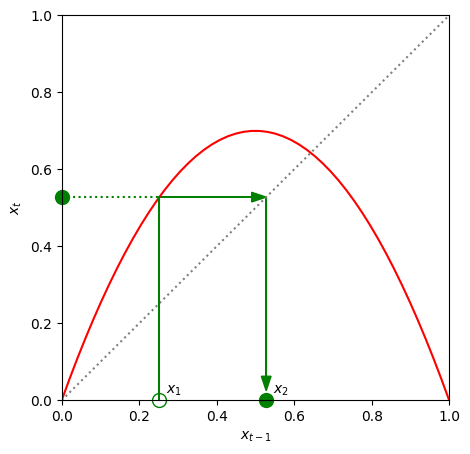

In [18]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plotFunctionWithXY(ax, xs, N, 'r-')
plotDropSpider(ax, N, 0.1, 2, 'g')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('$x_{t - 1}$')
ax.set_ylabel('$x_t$')

plt.show()

...and so forth. Each step iterates the function on its previous value, essentially "bounsing" the value off the $x = y$ line back to the x axis for the next iteration. If we iterate for a few steps we should see whether the function converges to an equilibrium point &ndash; you might want to guess where this will be before proceeding.

To make the process slightly clearer we'll adjust the step plot slightly, using arrows to show the way the point moves at each step and removing some of the labels..

In [19]:
def plotSpider(ax, f, x0, t, c):
    x_t = x0
    for i in range(t):
        x_tm1 = x_t
        x_t = f(x_t)
    
    ax.plot([x_tm1, x_tm1], [x_tm1, x_t],
            color=c, linestyle='solid')
    ax.plot([x_tm1, x_tm1], [0.0, x_t],
            color=c, linestyle='dotted')
    ax.plot([x_tm1], [0.0], 
            color=c, marker='o', markersize=10, fillstyle='none', clip_on=False)
    ax.plot([0.0], [x_t], 
            color=c, marker='o', markersize=10, fillstyle='full', clip_on=False)
    ax.arrow(x_tm1, x_t, (x_t - x_tm1), 0, length_includes_head=True,
            color=c, head_width=0.025, shape='full')
    ax.plot([0.0, x_tm1], [x_t, x_t],
            color=c, linestyle='dotted')

    return x_t

We can then plot several steps of the iterated function system and see the point move along its trajectory.

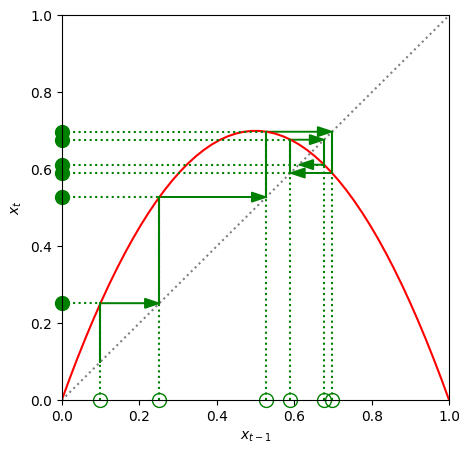

In [20]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plotFunctionWithXY(ax, xs, N, 'r-')

for t in [1, 2, 3, 4, 5, 6]:
    x_t = plotSpider(ax, N, 0.1, t, 'g')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('$x_{t - 1}$')
ax.set_ylabel('$x_t$')

plt.show()

This looks like the point is converging to the point where the bounding map meets the $x = y$ diagonal line &ndash; which makes perfect sense, as by definition a point on this line, when iterated through the function, will return to the same place. The point becomes "fixed" in place, hence the alternative name of "fixed point" or "fixpoint".

Notice how the trajectory spirals around the eventual fixpoint. This is a common behaviour in iterated function systems, although not always necessary. Also notice that the differences between successive values gets smaller and smaller as we approach convergence: this is something we'll make use of later.

You can of course see the fixpoints by inspection if you draw the map: a graphical solution to finding the fixpoint. So why bother with the cobweb? It tells us something about how quickly the point converges to the fixpoint, and (as we'll see later) there are some surprising behaviours that occur even in these simple systems that cobweb plots can help us understand.

## Fixedpoint iteration

You might be thinking that we could probably compute the fixpoint without the visualisation, but using the same method of repeated application of the function starting fron an initial point. This is called *fixedpoint iteration*, and it lets us find the fixpoint that's reached by iterating a function from a starting point.

There are some subtleties to this technique in general, but the na&iuml;ve version is simple to code. We provide a function and a starting point and iterate the function until its converges, which we define as when its value changes by less than some small value delta. For safety we also limit the number of iterations we allow, to stop the process diverging.

In [13]:
def fix(f, x=0.0, delta=1e-6, maxreps=100):
    '''Perform naive fixed-point iteration on the given function.
    
    :param f: the function (of one variable)
    :param x: (optional) the starting point (defaults to 0.0)
    :param delta: (optional) the stopping distance (defaults to 1e-6)
    :param maxreps: (optional) maximum number of steps (defaults to 50)
    :returns: the converged value of x'''
    for _ in range(maxreps):
        xprime = f(x)
        if abs(x - xprime) < delta:
            return xprime
        x = xprime
    return x

Applying this function to our logistic map and starting point gives:

In [14]:
fix(N, 0.1)

0.6428567414324947

This looks like it corresponds to the way the cobweb plot is converging. We can check that this is indeed a fixpoint:

In [15]:
x_fix = fix(N, 0.1)
x_fix1 = N(x_fix)
print(f'f({x_fix}) = {x_fix1}, difference {x_fix1 - x_fix}')

f(0.6428567414324947) = 0.6428574639964101, difference 7.225639153674024e-07


So the claimed fixpoint is indeed fixed to better than one part in a million.